<a href="https://colab.research.google.com/github/galanghanaf/praktikum-pengolahan-citra/blob/master/065119164_Galang_Hanafi_F_Tugas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 065119164_Galang Hanafi

In [47]:
!curl -s https://raw.githubusercontent.com/galanghanaf/praktikum-pengolahan-citra/master/tugas2_setup.sh | sh

figlet is already the newest version (2.2.5-3).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
   ______      __                     __  __                  _____ 
  / ____/___ _/ /___ _____  ____ _   / / / /___ _____  ____ _/ __(_)
 / / __/ __ `/ / __ `/ __ \/ __ `/  / /_/ / __ `/ __ \/ __ `/ /_/ / 
/ /_/ / /_/ / / /_/ / / / / /_/ /  / __  / /_/ / / / / /_/ / __/ /  
\____/\__,_/_/\__,_/_/ /_/\__, /  /_/ /_/\__,_/_/ /_/\__,_/_/ /_/   
                         /____/                                     
Menginstall library...
Mendownload gambar dari https://people.math.sc.edu/Burkardt/data/tif/tif.html
Selesai


In [48]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow

# 2. Mengolah gambar segmentasi citra

## 2.1. Deteksi Bentuk Objek (Deteksi Tepi)
### 2.1.1. Operator Roberts

In [49]:
img = cv2.imread("kids.tif", cv2.IMREAD_GRAYSCALE).astype(float)
print(img.shape)

(400, 318)


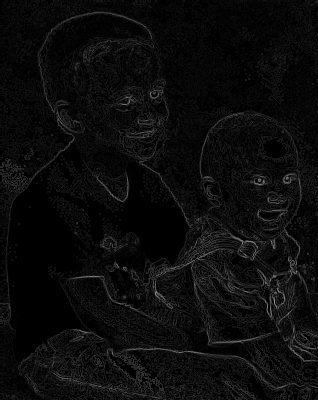

In [50]:
robertsX = np.array([[1, 0], [0, -1]])
imgx = cv2.filter2D(img, -1, robertsX)

robertsY = np.array([[0, 1], [-1, 0]])
imgy = cv2.filter2D(img, -1, robertsY)

cv2_imshow(np.sqrt(imgx ** 2 + imgy ** 2))

### 2.1.2. Operator Prewitt

In [51]:
img = cv2.imread("kids.tif", cv2.IMREAD_GRAYSCALE).astype(float)
print(img.shape)

(400, 318)


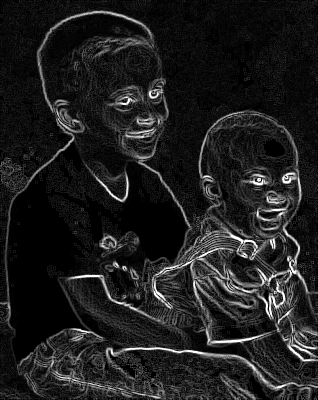

In [52]:
prewittX = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
imgx = cv2.filter2D(img, -1, prewittX)

prewittY = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
imgy = cv2.filter2D(img, -1, prewittY)

cv2_imshow(np.sqrt(imgx ** 2 + imgy ** 2))

### 2.1.3. Operator Sobel

In [53]:
img = cv2.imread("kids.tif", cv2.IMREAD_GRAYSCALE).astype(float)
print(img.shape)

(400, 318)


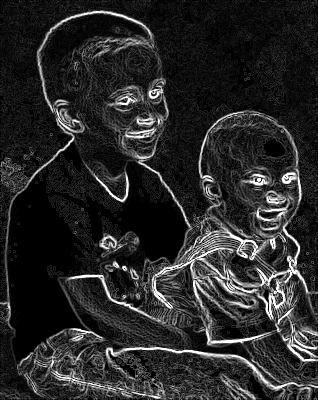

In [54]:
sobelX = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
imgx = cv2.filter2D(img, -1, sobelX)

sobelY = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
imgy = cv2.filter2D(img, -1, sobelY)

cv2_imshow(np.sqrt(imgx ** 2 + imgy ** 2))

### 2.1.4. Operator Canny

In [55]:
img = cv2.imread("kids.tif")
print(img.shape)

(400, 318, 3)


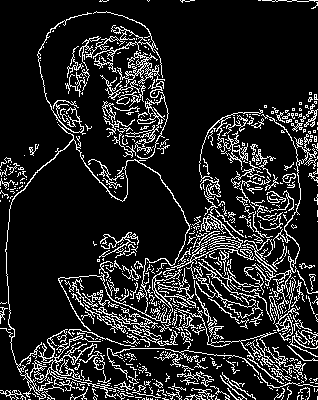

In [56]:
img_edges = cv2.Canny(img, 50, 150)
cv2_imshow(img_edges)

## 2.2 Deteksi Outline

In [57]:
img = cv2.imread("saturn.png")
print(img.shape)

(480, 640, 3)


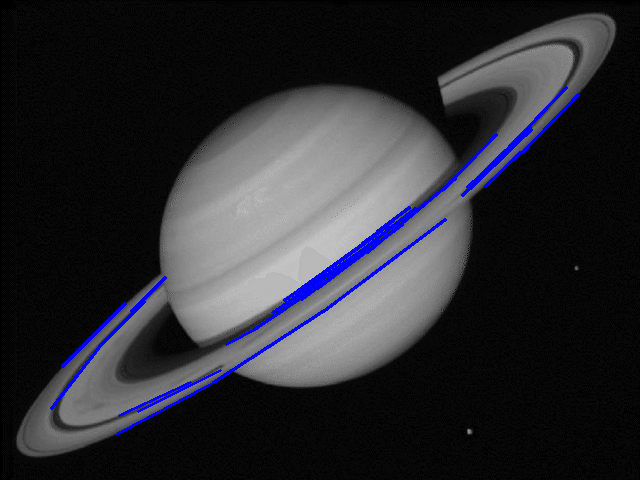

In [58]:
edges = cv2.Canny(img, 50, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 70, minLineLength=30, maxLineGap=10)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

cv2_imshow(img)